__Aspiring_minds_employability_outcomes_2015 DataSet descrition__:  

_The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines_.

_The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills._  
  
_The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset_.  


__Objective__:


_Performing Exploratory Data Analysis(EDA) on aspiring_minds_employability_outcomes_2015 DataSet_.

In [1]:
#Importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the data 
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [4]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [5]:
#dataframe shape
df.shape

(3998, 39)

dataset contains 3998 rows and 39 columns

In [6]:
#dataframe head
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [7]:
#dataframe tail
df.tail()

Unnamed: 0      ID  Salary        DOJ                  DOL  \
3993      train   47916  280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781  100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888  320000 2013-07-01              present   
3996      train  947111  200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966  400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
3993            software engineer        New Delhi       m 1987-04-15   
3994             technical writer         Hyderabad      f 1992-08-27   
3995  associate software engineer         Bangalore      m 1991-07-03   
3996           software developer  Asifabadbanglore      f 1992-03-20   
3997      senior systems engineer           Chennai      f 1991-02-26   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.32553                -0.6035  

[5 rows x 39 columns]

In [8]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [9]:
#getting only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

In [10]:
num_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [11]:
len(num_df.columns)

27

there are 27 features of numeric datatype in the given  dataset

<h3 style="color: blue">Univariate Analysis on numerical columns:</h3>

<h4 style="color: green">PDF distribution of Salary:</h4>

Skewness:6.45
Kurtosis:80.93


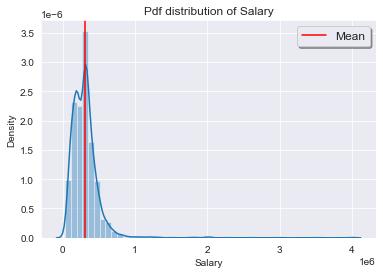

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
sns.distplot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='red', label='Mean')
plt.title("Pdf distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

skew = df['Salary'].skew()
kurt = df['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

plot has long tail towards right,its a log normal distribution and positively right skewed ,has high skweness

<h4 style="color: green">PDF distribution of 10percentage:</h4>

Skewness:-0.59
Kurtosis:-0.11


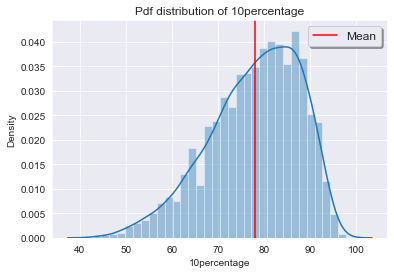

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
sns.distplot(df['10percentage'])
plt.axvline(df['10percentage'].mean(), color="red", label="Mean")
plt.title("Pdf distribution of 10percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['10percentage'].skew()
kurt = df['10percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

plot has a thick tail towards the left side and a negatively skewed distribution

<h4 style="color: green">PDF distribution of 12percentage:</h4>

Skewness:-0.03
Kurtosis:-0.63


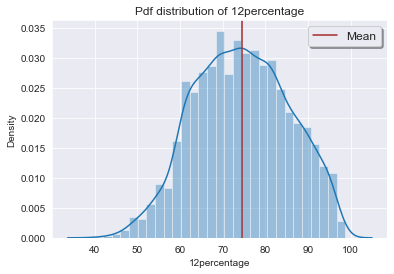

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
sns.distplot(df['12percentage'])
plt.axvline(df['12percentage'].mean(), color="brown", label="Mean")
plt.title("Pdf distribution of 12percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['12percentage'].skew()
kurt = df['12percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

plot has wider peak ,thick left tail and negatively left skewed

<h4 style="color: green">PDF distribution of collegeGPA:</h4>

Skewness:-1.25
Kurtosis:10.23


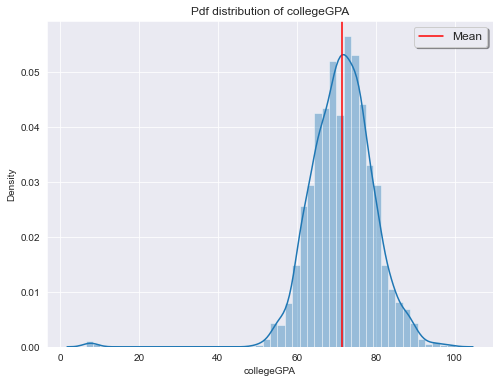

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['collegeGPA'])
plt.axvline(df['collegeGPA'].mean(), color="red", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True,fontsize="larger")

skew = df['collegeGPA'].skew()
kurt = df['collegeGPA'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

plot has long tail towards left and  negatively left skewed

<h3 style="color: green">Outliers Detection:</h3>
<h4 style="color: green">Box plot for the numerical features</h4>

In [17]:
a = num_df.columns
list1 = list(a)

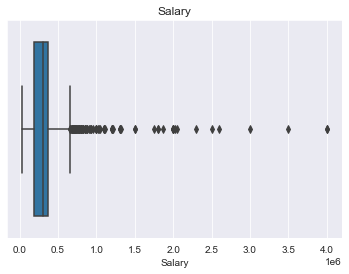

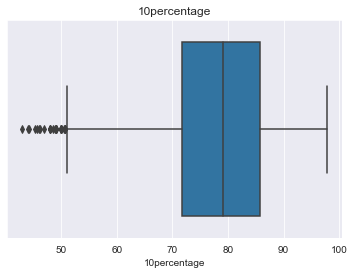

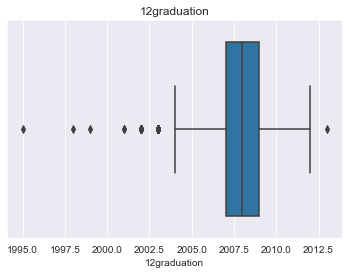

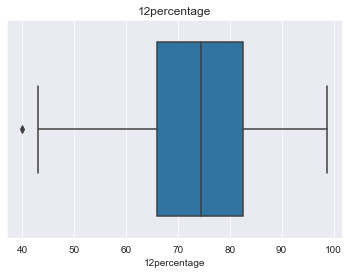

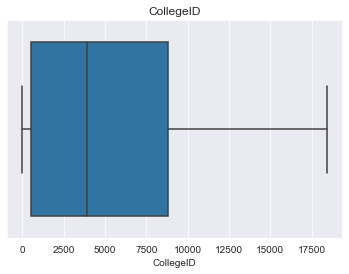

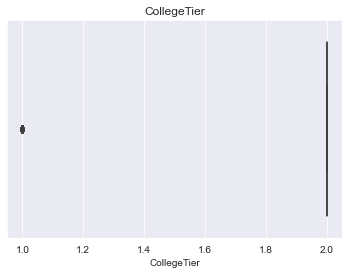

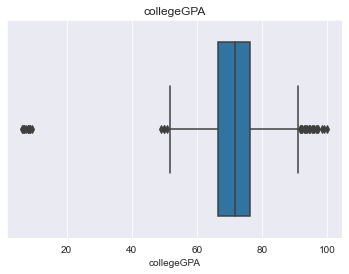

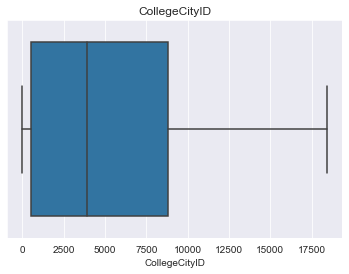

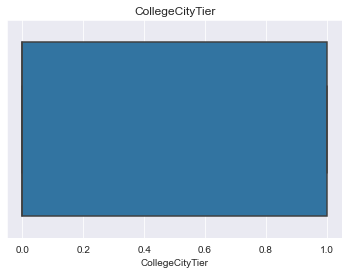

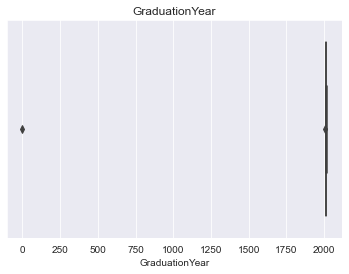

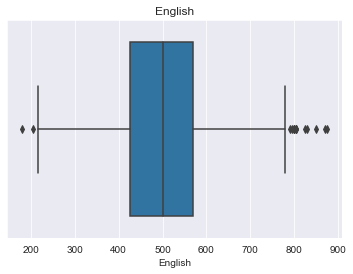

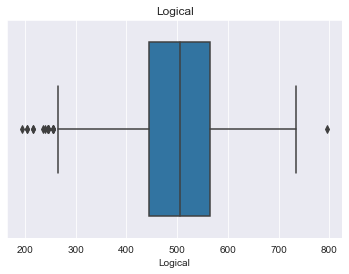

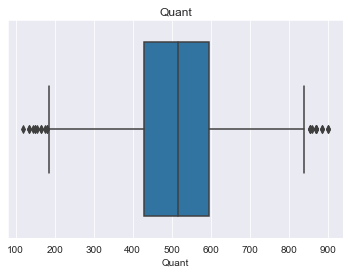

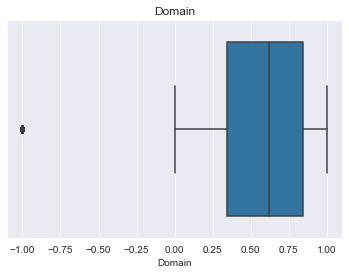

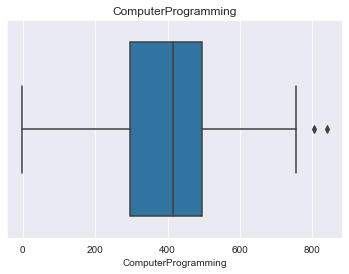

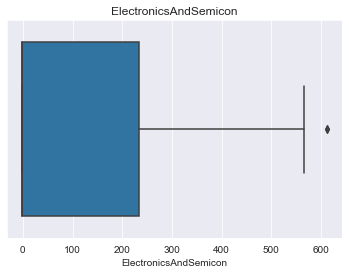

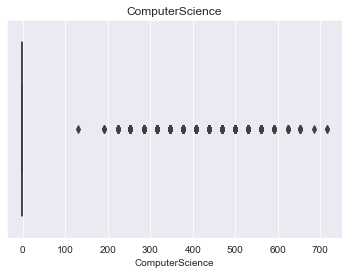

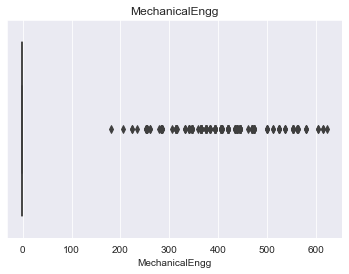

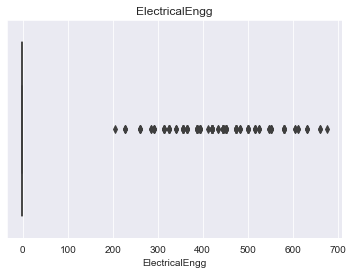

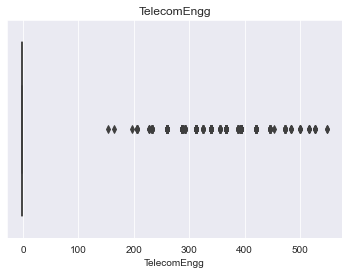

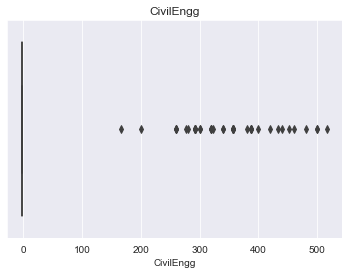

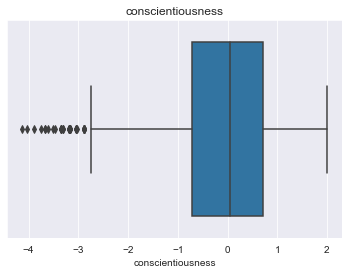

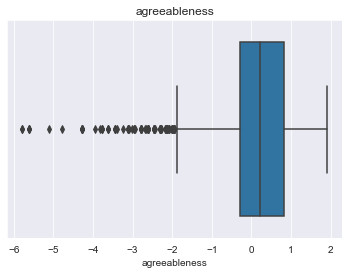

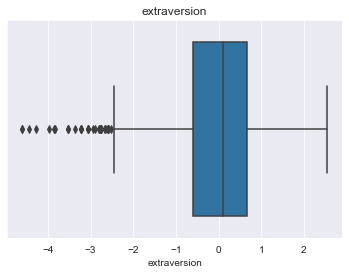

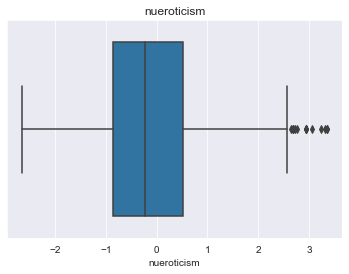

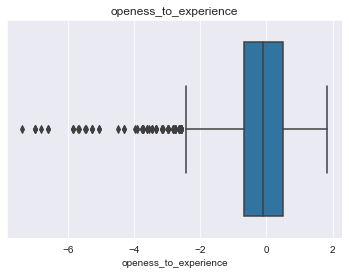

In [19]:
#box plot for the numerical features
for i in list1[1:]:
    sns.boxplot(num_df[i])
    plt.title(i)
    plt.show()

- 'Salary':- contains outliers 
- '10percentage':-contains outliers
- '12graduation':- contains outliers
- '12percentage':- contain a outlier
- 'CollegeID':- no outliers 
- 'CollegeTier':-contain a outlier
- 'collegeGPA':-contain a outlier 
- 'CollegeCityID':-no outliers
- 'GraduationYear':-contain outlier 
- 'English':-contain outlier
- 'Logical':-contain outlier
- 'Quant':-contain a outlier
- 'Domain':-contain a outlier
- 'ComputerProgramming':-has outliers 
- 'ElectronicsAndSemicon':-has a outlier
- 'ComputerScience':-contains outliers 
- 'MechanicalEngg':-contains outliers
- 'ElectricalEngg':-contains outliers
- 'TelecomEngg':-contains outliers
- 'CivilEngg':-contains outliers 
- 'conscientiousness':-contains outliers
- 'agreeableness':-contains outliers
- 'extraversion':-contains outliers
- 'nueroticism':- contains outliers
- 'openess_to_experience':- contains outliers

In [20]:
#checking null values
for i in list1:
    print("null values in i {} is {}".format(i,num_df[i].isnull().sum()))

null values in i ID is 0
null values in i Salary is 0
null values in i 10percentage is 0
null values in i 12graduation is 0
null values in i 12percentage is 0
null values in i CollegeID is 0
null values in i CollegeTier is 0
null values in i collegeGPA is 0
null values in i CollegeCityID is 0
null values in i CollegeCityTier is 0
null values in i GraduationYear is 0
null values in i English is 0
null values in i Logical is 0
null values in i Quant is 0
null values in i Domain is 0
null values in i ComputerProgramming is 0
null values in i ElectronicsAndSemicon is 0
null values in i ComputerScience is 0
null values in i MechanicalEngg is 0
null values in i ElectricalEngg is 0
null values in i TelecomEngg is 0
null values in i CivilEngg is 0
null values in i conscientiousness is 0
null values in i agreeableness is 0
null values in i extraversion is 0
null values in i nueroticism is 0
null values in i openess_to_experience is 0


In [21]:
#checking for values that are not null values and are not in the value range of the
#features i.e values like ?,"",0 etc
for i in list1[1:]:
    print(i,num_df[i].unique())
    print("\n")

Salary [ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775000  490000 1300000 3500000
  910000  570000  255000  130000  175000  73

CollegeID [1141 5807   64 ... 3572 6327 4883]


CollegeTier [2 1]


collegeGPA [78.   70.06 70.   ... 65.05 74.73 70.42]


CollegeCityID [1141 5807   64 ... 3572 6327 4883]


CollegeCityTier [0 1]


GraduationYear [2011 2012 2014 2016 2013 2010 2015 2009 2017    0 2007]


English [515 695 615 635 545 560 590 605 565 495 380 395 485 685 465 455 385 370
 625 575 415 535 580 475 570 430 450 510 425 555 300 505 440 525 420 640
 444 630 665 675 325 405 375 315 710 345 250 350 275 360 265 595 585 520
 500 735 765 335 490 660 355 530 365 655 730 445 720 645 650 875 534 454
 544 295 285 435 464 705 554 745 280 825 290 715 310 215 700 870 305 524
 755 790 800 205 725 780 404 770 805 180 830 795 255 324 775 394 240 225
 850 684 334]


Logical [585 610 545 625 555 435 670 565 455 605 580 425 520 530 495 445 535 360
 335 510 570 375 405 485 475 525 640 595 560 340 395 415 465 505 385 460
 410 500 645 480 355 450 440 470 255 305 590 630 365 350 325 400 205 655
 295 345 390 665 515 540 680 245 620 4

- Domain : contains -1 value which doesn't belong to the range of values for domain.

- ComputerProgramming: contains -1 value which doesn't belong to the range of values for ComputerProgramming .

- ElectronicsAndSemicon: contains -1 value which doesn't belong to the range of values for ElectronicsAndSemicon.

- ComputerScience: contains -1 value which doesn't belong to the range of values for ComputerScience.

- MechanicalEngg : contains -1 value which doesn't belong to the range of values for MechanicalEngg.

- ElectricalEngg: contains -1 value which doesn't belong to the range of values for domain.

- TelecomEngg: contains -1 value which doesn't belong to the range of values for domain.

- CivilEngg: contains -1 value which doesn't belong to the range of values for domain.

<h4 style="color: green">Histogram for the Features to check the normality </h4>

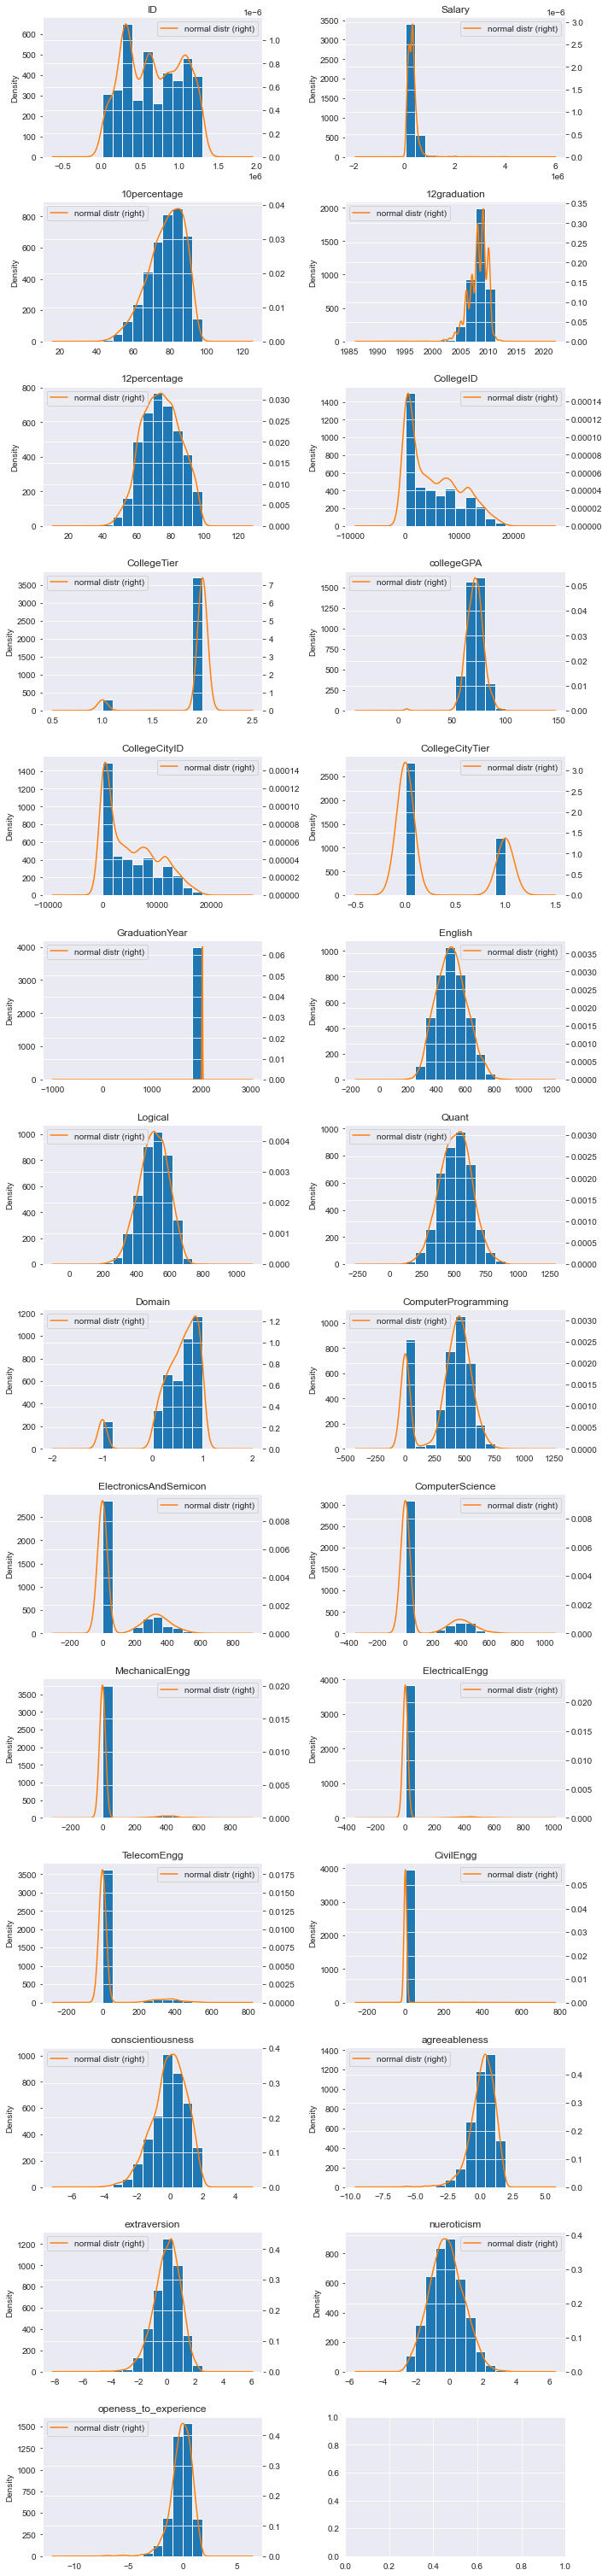

In [22]:
#histogram for the variables

k = len(num_df.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(num_df.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name,label="normal distr")
    ax2.set_ylim(0)
    ax2.legend()

fig.tight_layout()

- 'Salary':- right skewed so it implies outliers in the data 
- '12graduation':- left skewed which indicates outliers
- 'CollegeTier':-left skewed which indicates outliers
- 'collegeGPA':- left skewed which indicates outliers
- 'CollegeCityID':-right skewed which indicates outliers
- 'agreeableness':-left skewed which indicates outliers
- 'openess_to_experience':- left skewed which indictes outliers

__Checking Skewness and Kurtosis__:

__Skewness__

skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. 

skewness tells you the amount and direction of skew (departure from horizontal symmetry). 

The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical

- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

__Kurtosis__

Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

In [23]:
a = num_df.columns
list1 = list(a)
for i in list1[1:]:
    skew_  = float(num_df[i].skew())
    kurt   = float(num_df[i].kurt())
    print("skewness value {} of {} ".format(skew_,i))
    print("Kurtosis value {} of {}\n".format(kurt,i))

skewness value 6.451081166224832 of Salary 
Kurtosis value 80.92999627162538 of Salary

skewness value -0.5910185081648047 of 10percentage 
Kurtosis value -0.1102843100198605 of 10percentage

skewness value -0.9640901430967733 of 12graduation 
Kurtosis value 1.9511644059905469 of 12graduation

skewness value -0.03260741437482245 of 12percentage 
Kurtosis value -0.6307374665885321 of 12percentage

skewness value 0.649176333927607 of CollegeID 
Kurtosis value -0.7674413638286568 of CollegeID

skewness value -3.2479906747351404 of CollegeTier 
Kurtosis value 8.553722173976427 of CollegeTier

skewness value -1.2492091640381637 of collegeGPA 
Kurtosis value 10.234244459804753 of collegeGPA

skewness value 0.649176333927607 of CollegeCityID 
Kurtosis value -0.7674413638286568 of CollegeCityID

skewness value 0.8711203104937956 of CollegeCityTier 
Kurtosis value -1.2417708510593095 of CollegeCityTier

skewness value -63.06806402522399 of GraduationYear 
Kurtosis value 3984.3696957519783 of Gr

- 'Salary':-   distribution of the data is highely skewed
- '10percentage':-  distribution of the data is moderately skewed
- '12graduation':-  distribution of the data is moderately skewed
- '12percentage':-  distribution of the data is symmetrical
- 'CollegeTier':- the distribution is moderately skewed.
- 'collegeGPA':- distribution of the data is highely skewed
- 'GraduationYear':- distribution of the data is highely skewed
- 'English':- the distribution is approximately symmetric.
- 'Logical':- the distribution is approximately symmetric.
- 'Quant':- distribution of the data is symmetrical
- 'Domain':- distribution of the data is highely skewed
- 'ComputerProgramming':- distribution of the data is moderately skewed 
- 'ElectronicsAndSemicon':- distribution of the data is highely skewed
- 'ComputerScience':- distribution of the data is highely skewed 
- 'MechanicalEngg':- distribution of the data is highely skewed
- 'ElectricalEngg':- distribution of the data is highely skewed
- 'TelecomEngg':- distribution of the data is highely skewed
- 'CivilEngg':- distribution of the data is highely skewed
- 'conscientiousness':- distribution of the data is approximately symmetrical
- 'agreeableness':- distribution of the data is highely skewed
- 'extraversion':- distribution of the data is approximately symmetrical
- 'nueroticism':-  distribution of the data is approximately symmetrical
- 'openess_to_experience':- distribution of the data is highely skewed

<h4 style="color: green">Checking Normality with QQ Plot</h4>

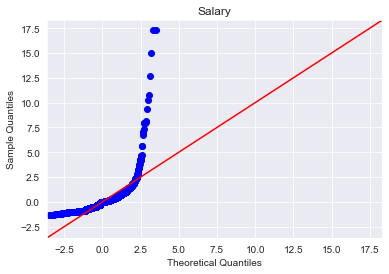

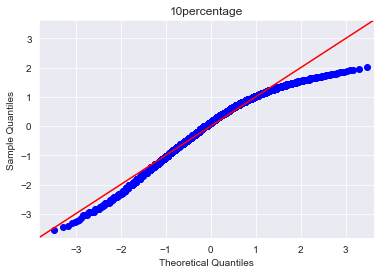

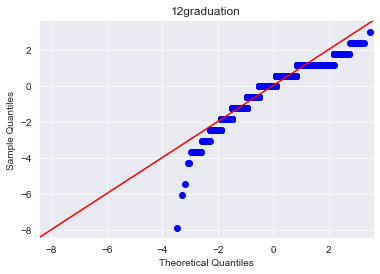

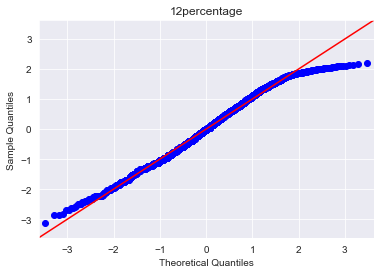

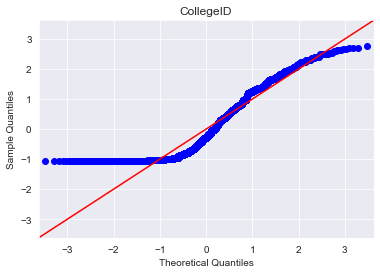

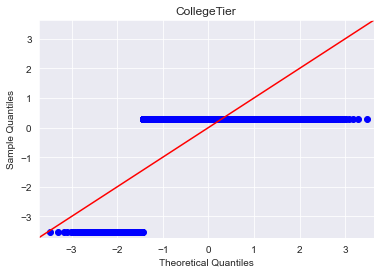

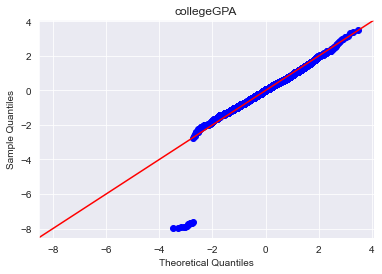

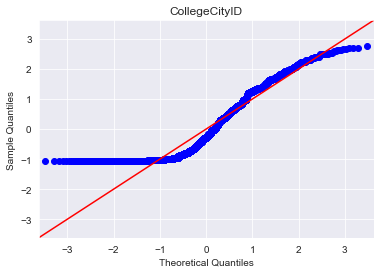

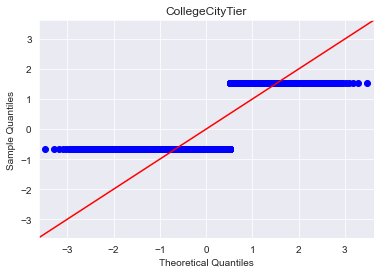

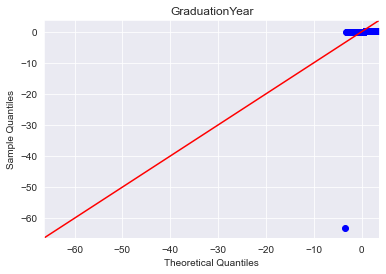

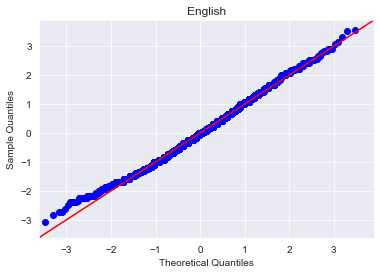

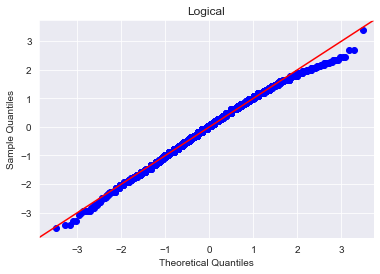

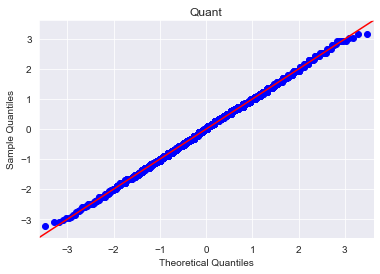

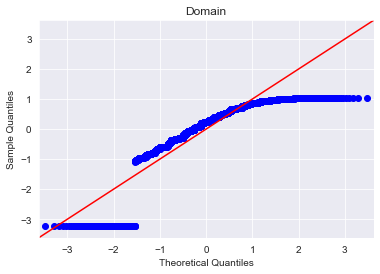

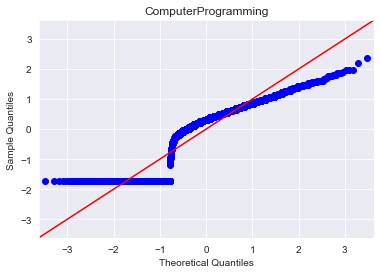

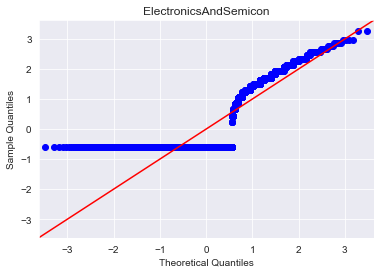

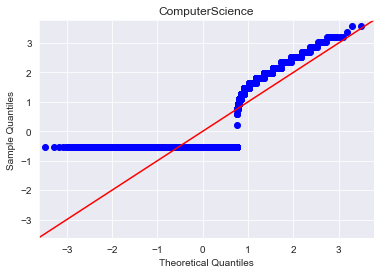

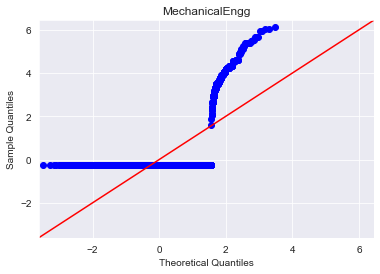

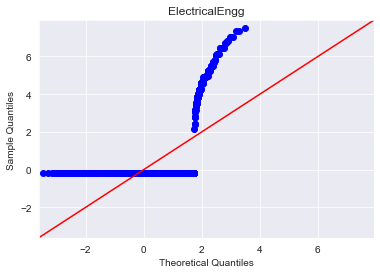

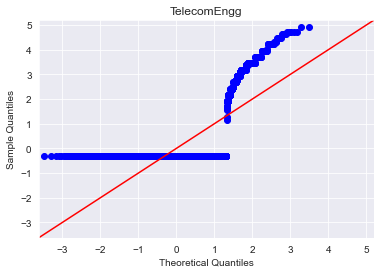

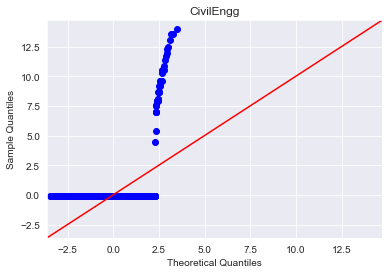

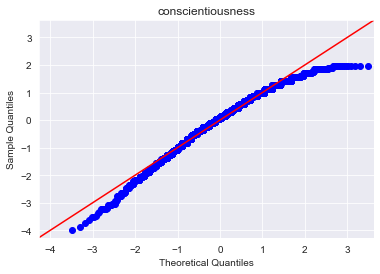

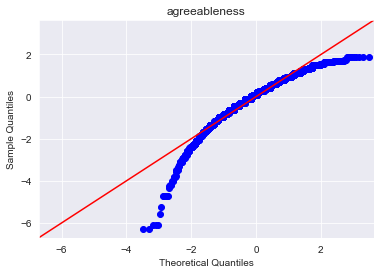

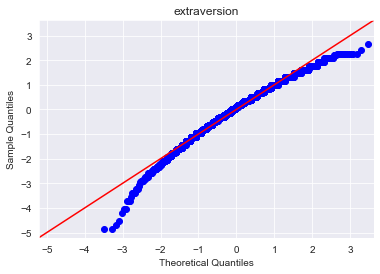

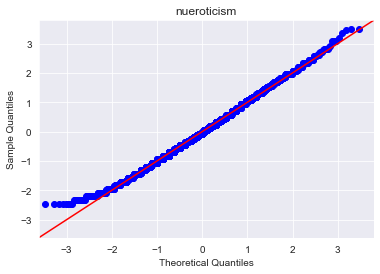

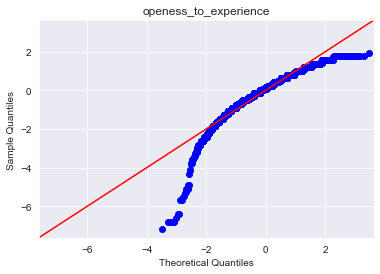

In [25]:
import statsmodels.api as sm
import pylab as py
a = num_df.columns
list2 = list(a)

for i in list2[1:]:
    sm.qqplot(num_df[i],line="45",fit=True)
    py.title(i)
    py.show()

- 'Salary':-   distribution of the data is doesnot follow normal distribution
- '10percentage':-  distribution of the data is doesnot follow normal    distribution

- '12graduation':-  distribution of the data doesnot follow normal distribution
- '12percentage':-  distribution of the data moderately follow normal distribution
- 'CollegeTier':- distribution of the data doesnot follow normal distribution
- 'collegeGPA':- distribution of the data moderately follow normal distribution
- 'GraduationYear':- distribution of the data doesnot follow normal distribution
- 'English':- the distribution follow normal distribution
- 'Logical':- the distribution  moderately follow normal distribution
- 'Quant':- distribution of the data follow normal distribution
- 'Domain':- distribution of the data  doesnot follow normal distribution
- 'ComputerProgramming':- distribution of the data doesnot follow normal distribution
- 'ElectronicsAndSemicon':- distribution of the data doesnot follow normal distribution
- 'ComputerScience':- distribution of the data s doesnot follow normal distribution
- 'MechanicalEngg':- distribution of the data doesnot follow normal distribution
- 'ElectricalEngg':- distribution of the data doesnot follow normal distribution
- 'TelecomEngg':- distribution of the data doesnot follow normal distribution
- 'CivilEngg':- distribution of the data  doesnot follow normal distribution
- 'conscientiousness':- distribution of the data doesnot follow normal distribution
- 'agreeableness':- distribution of the data doesnot follow normal distribution
- 'extraversion':- distribution of the data doesnot follow normal distribution
- 'nueroticism':-  distribution of the data  moderately follow normal distribution
- 'openess_to_experience':- distribution of the data doesnot follow normal distribution

<h4 style="color: green">GraduationYear with respect to Gender:</h4>

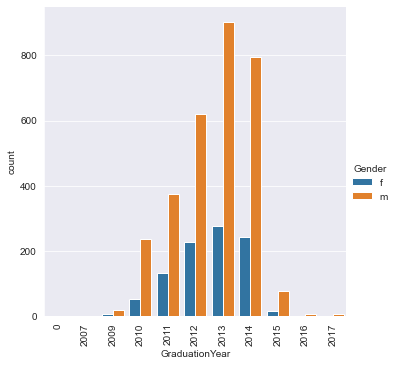

In [26]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

<h3 style="color: green">Univariate Analysis on categorical columns:</h3>


In [27]:
#getting all the categorical columns 
cat_df = df.select_dtypes(include=['object'])

In [28]:
cat_df.columns

Index(['Unnamed: 0', 'DOL', 'Designation', 'JobCity', 'Gender', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

<h3 style="color: green">Univariate Analysis on Designation:</h3>

[]

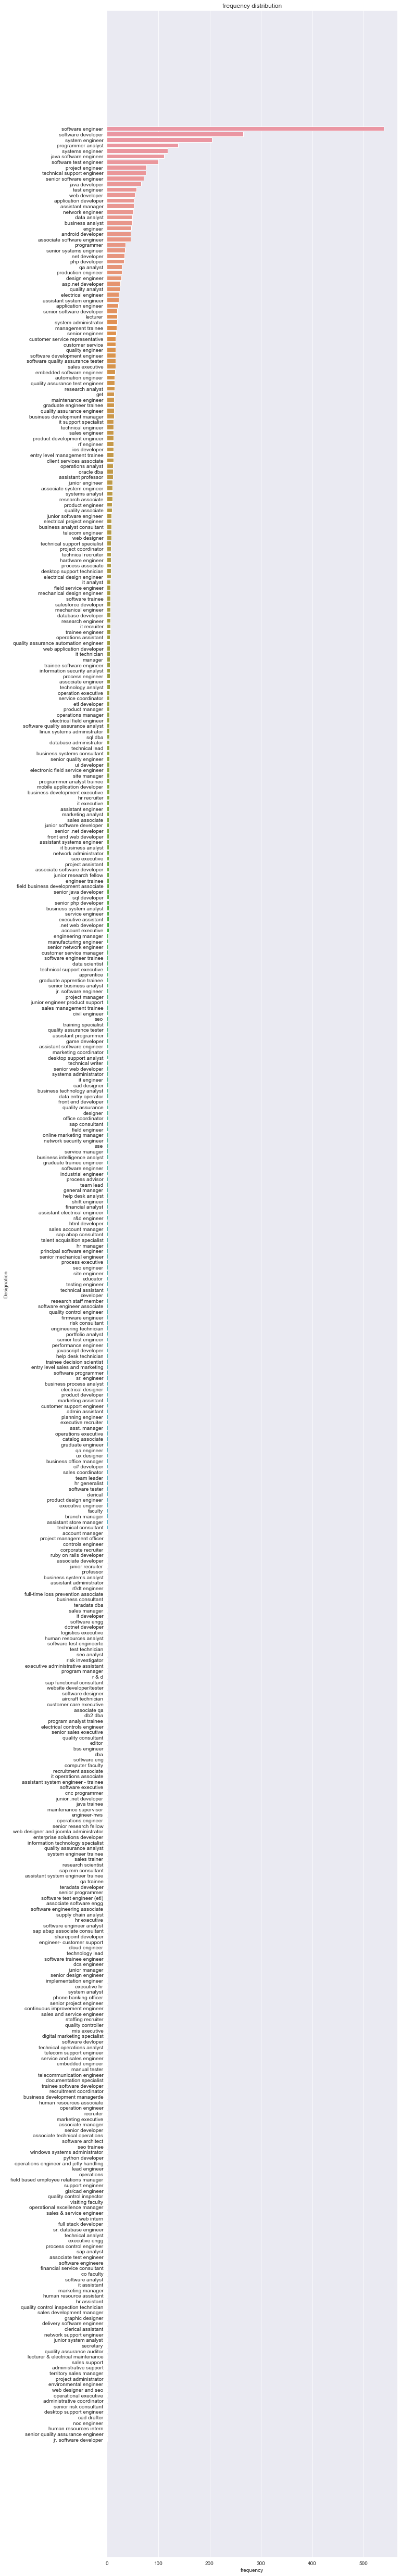

In [29]:
data_pos = cat_df['Designation'].value_counts()
fig1 = plt.figure(figsize=(10,90))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("Designation")
plt.plot()

most of the students mostly joined as software engineer with a frequeny of more than 500 followed by jobs like software developer,system engineer,programmer analyst etc

<h3 style="color: green">Univariate Analysis on JobCity:</h3>

[]

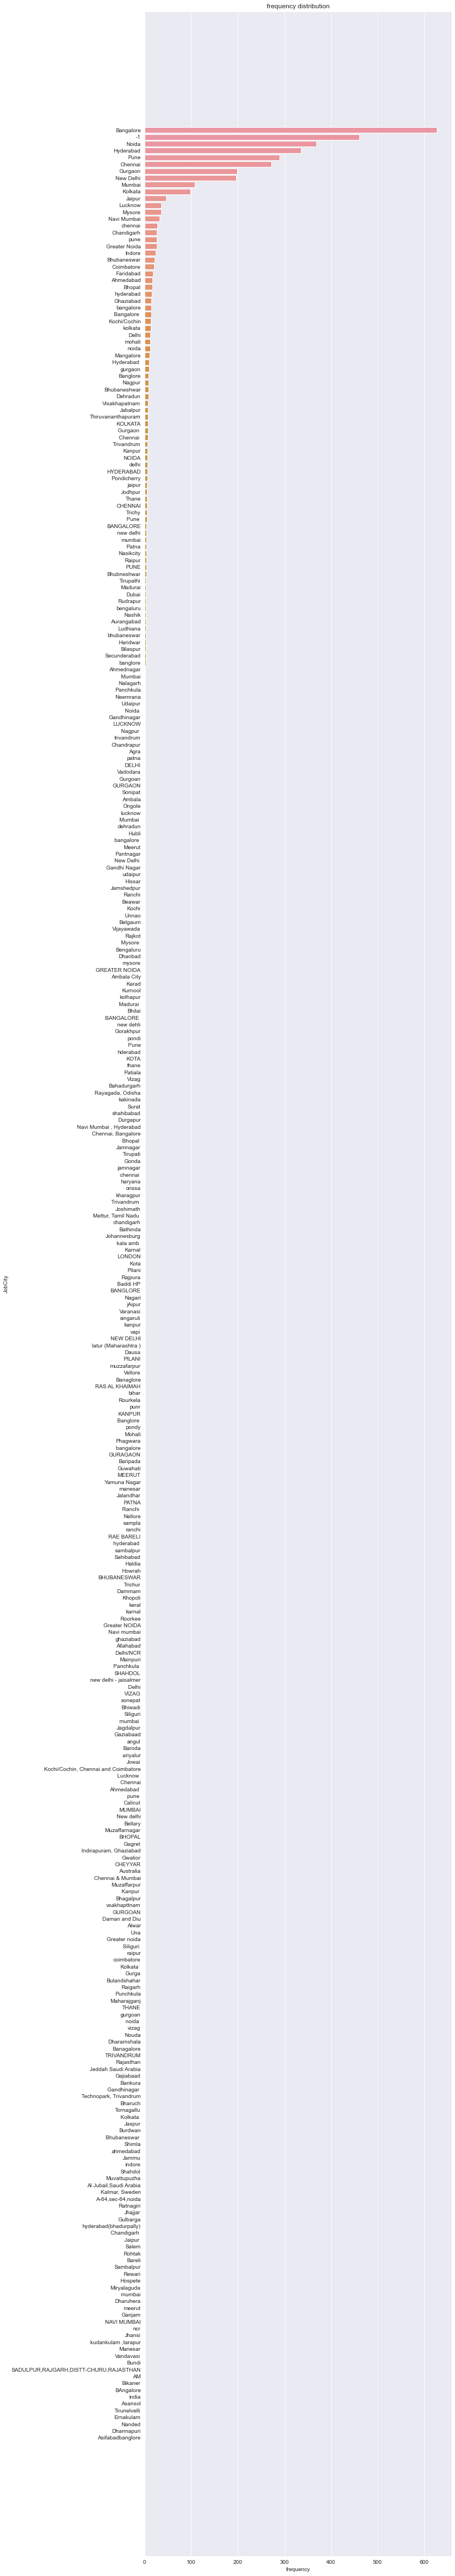

In [30]:
data_pos = cat_df['JobCity'].value_counts()
fig1 = plt.figure(figsize=(10,85))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("JobCity")
plt.plot()

- most of the students job location is Bangalore
- There is an outlier in the feature JobCity as -1

<h3 style="color: green">Univariate Analysis on Gender:</h3>

[]

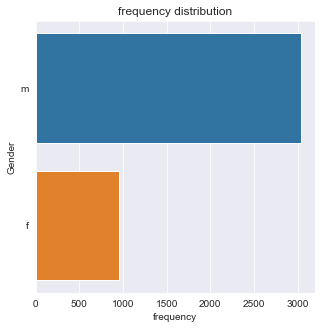

In [31]:
data_pos = cat_df['Gender'].value_counts()
fig1 = plt.figure(figsize=(5,5))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("Gender")
plt.plot()

male students are more in number than female in the dataset 

<h3 style="color: green">Univariate Analysis on 10board:</h3>

[]

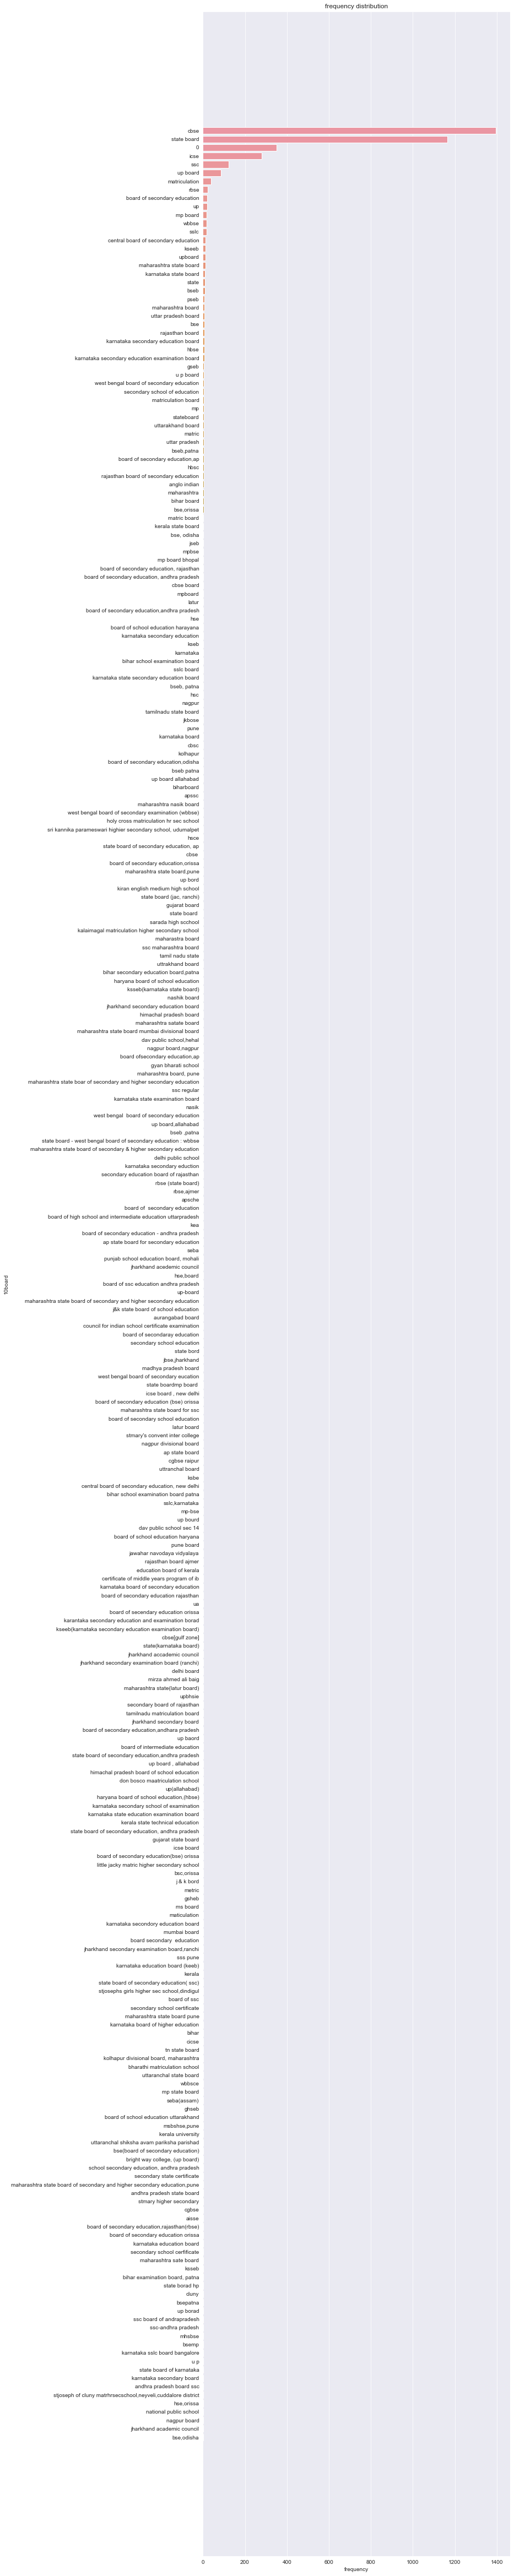

In [32]:
data_pos = cat_df['10board'].value_counts()
fig1 = plt.figure(figsize=(10,85))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("10board")
plt.plot()

- most of the students belong to the cbse board ,followed by state board in 10 board
- has an outlier of value 0 in 10board

<h3 style="color: green">Univariate Analysis on 12board:</h3>

[]

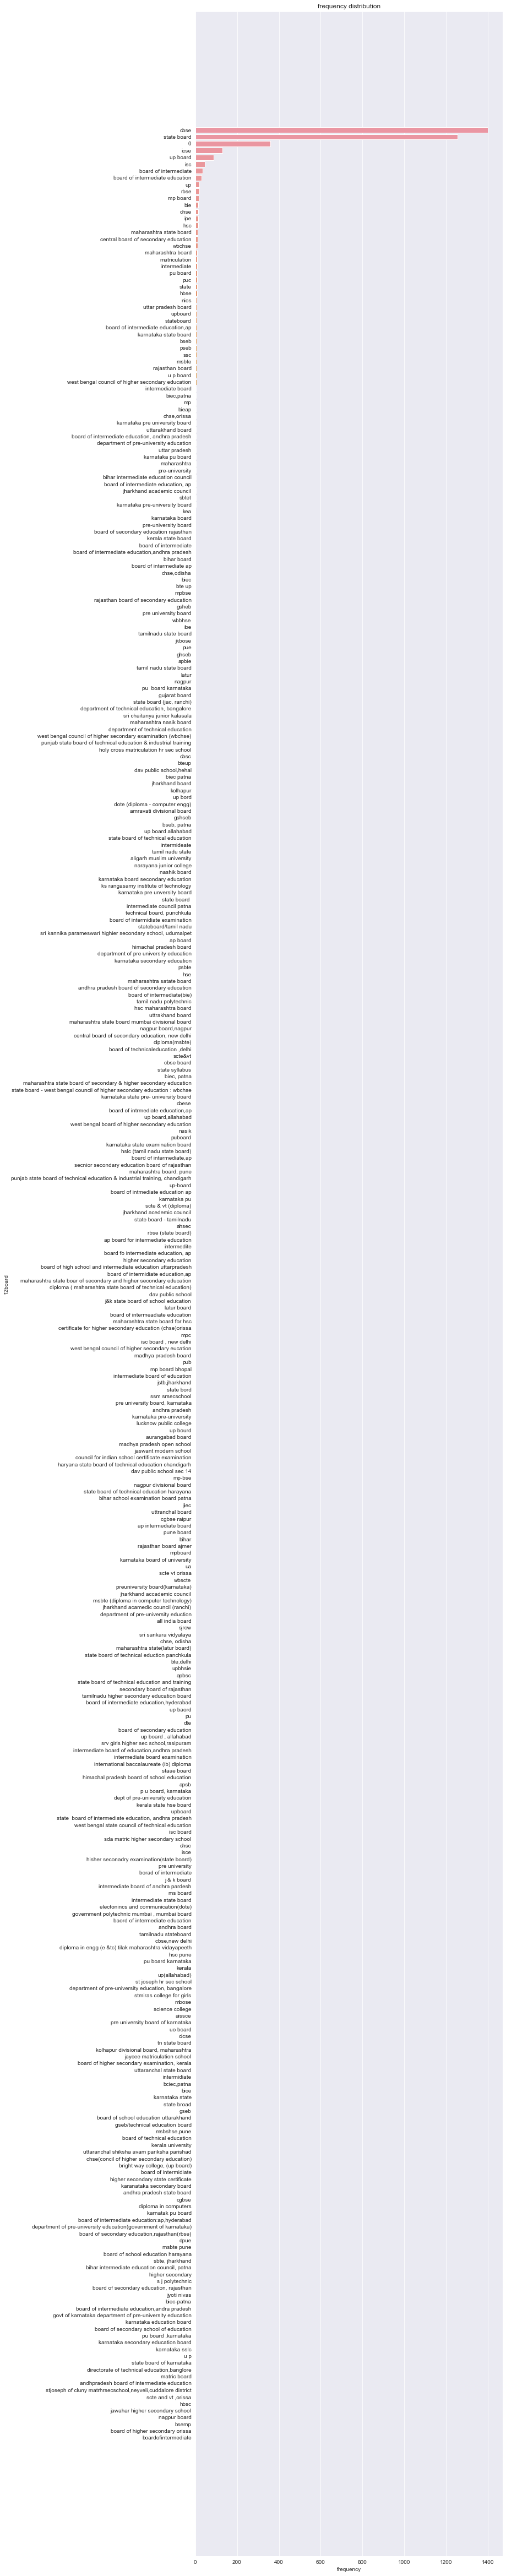

In [33]:
data_pos = cat_df['12board'].value_counts()
fig1 = plt.figure(figsize=(10,85))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("12board")
plt.plot()

- most of the students belong to the cbse board ,followed by state board in 12 board
- has an outlier of value 0 in 12board column


<h3 style="color: green">Univariate Analysis on Degree:</h3>

[]

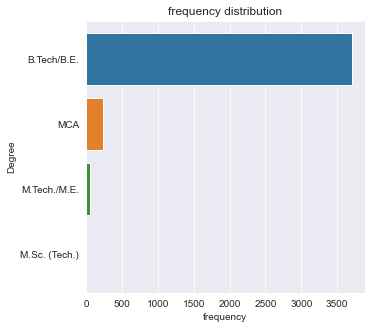

In [34]:
data_pos = cat_df['Degree'].value_counts()
fig1 = plt.figure(figsize=(5,5))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("Degree")
plt.plot()

most of the students are from btech/B.E Background

<h3 style="color: green">Univariate Analysis on Specialization:</h3>

[]

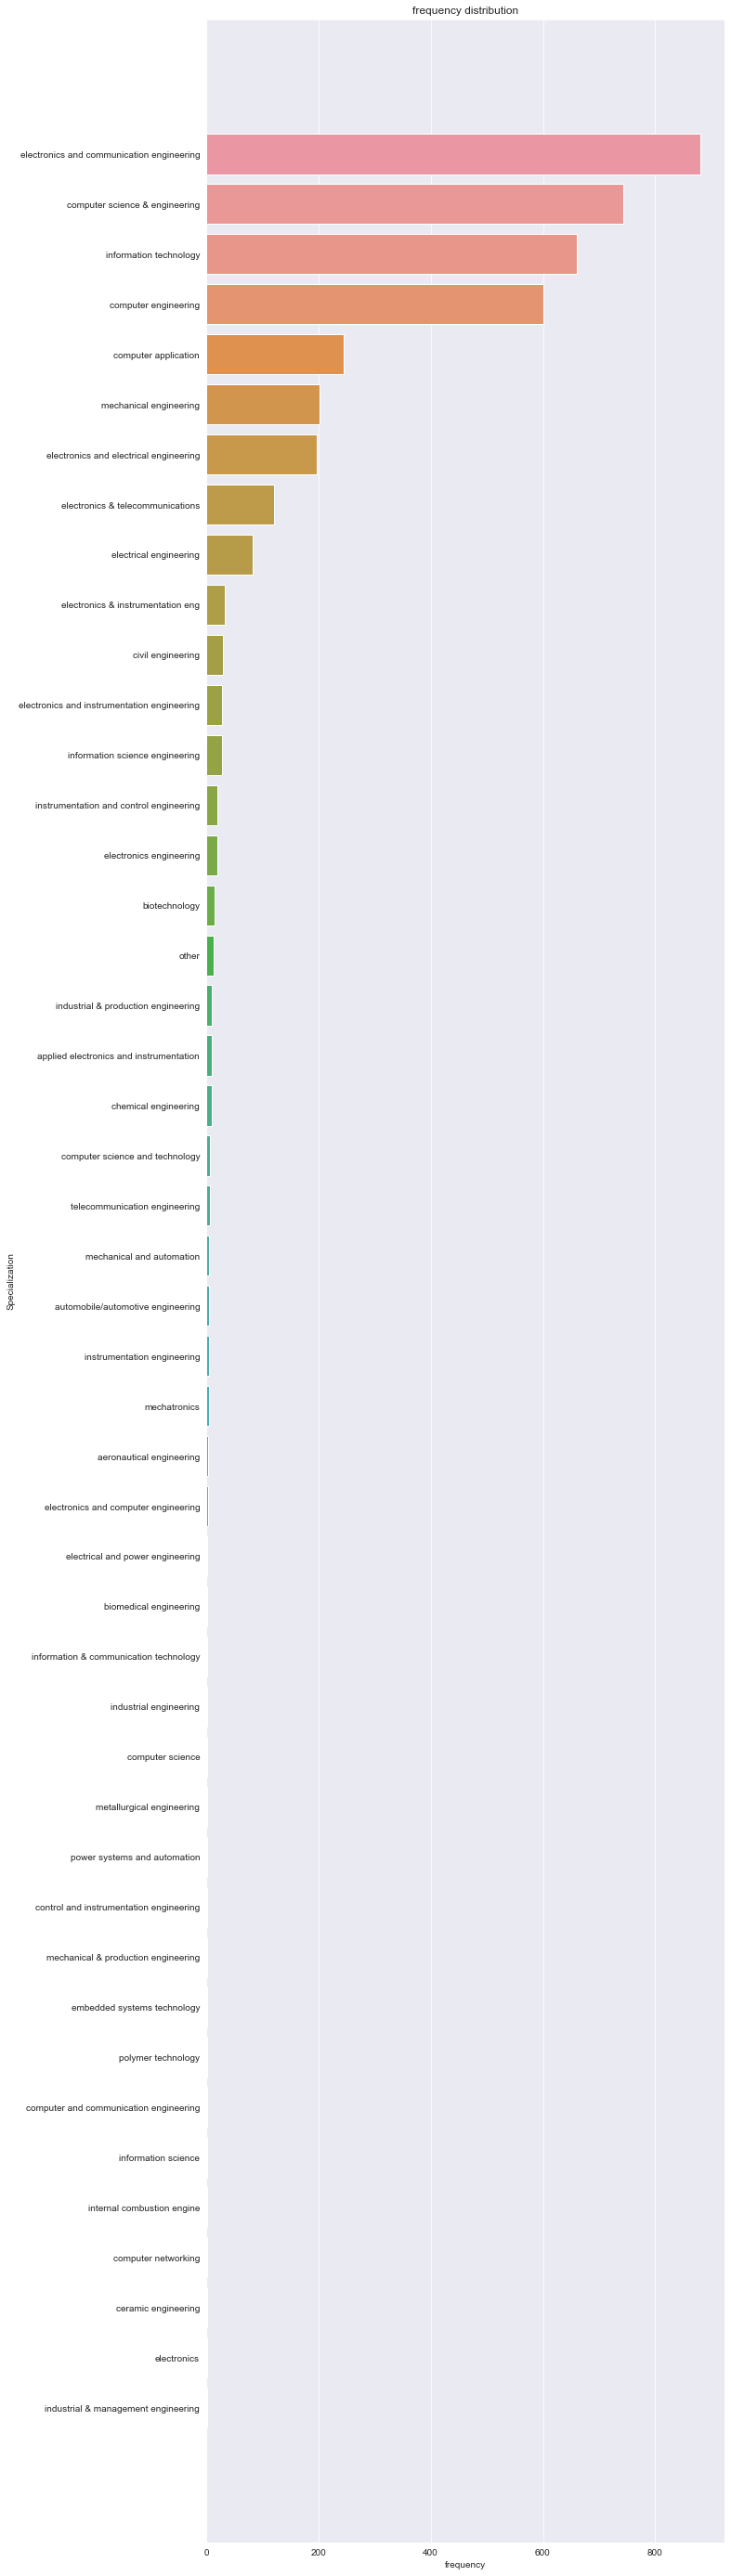

In [35]:
data_pos = cat_df['Specialization'].value_counts()
fig1 = plt.figure(figsize=(10,50))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("Specialization")
plt.plot()

most of the students Specialization is electronics and communication engineering followed by computer science and engineering ,Information technology

<h3 style="color: green">Univariate Analysis on CollegeState</h3>

[]

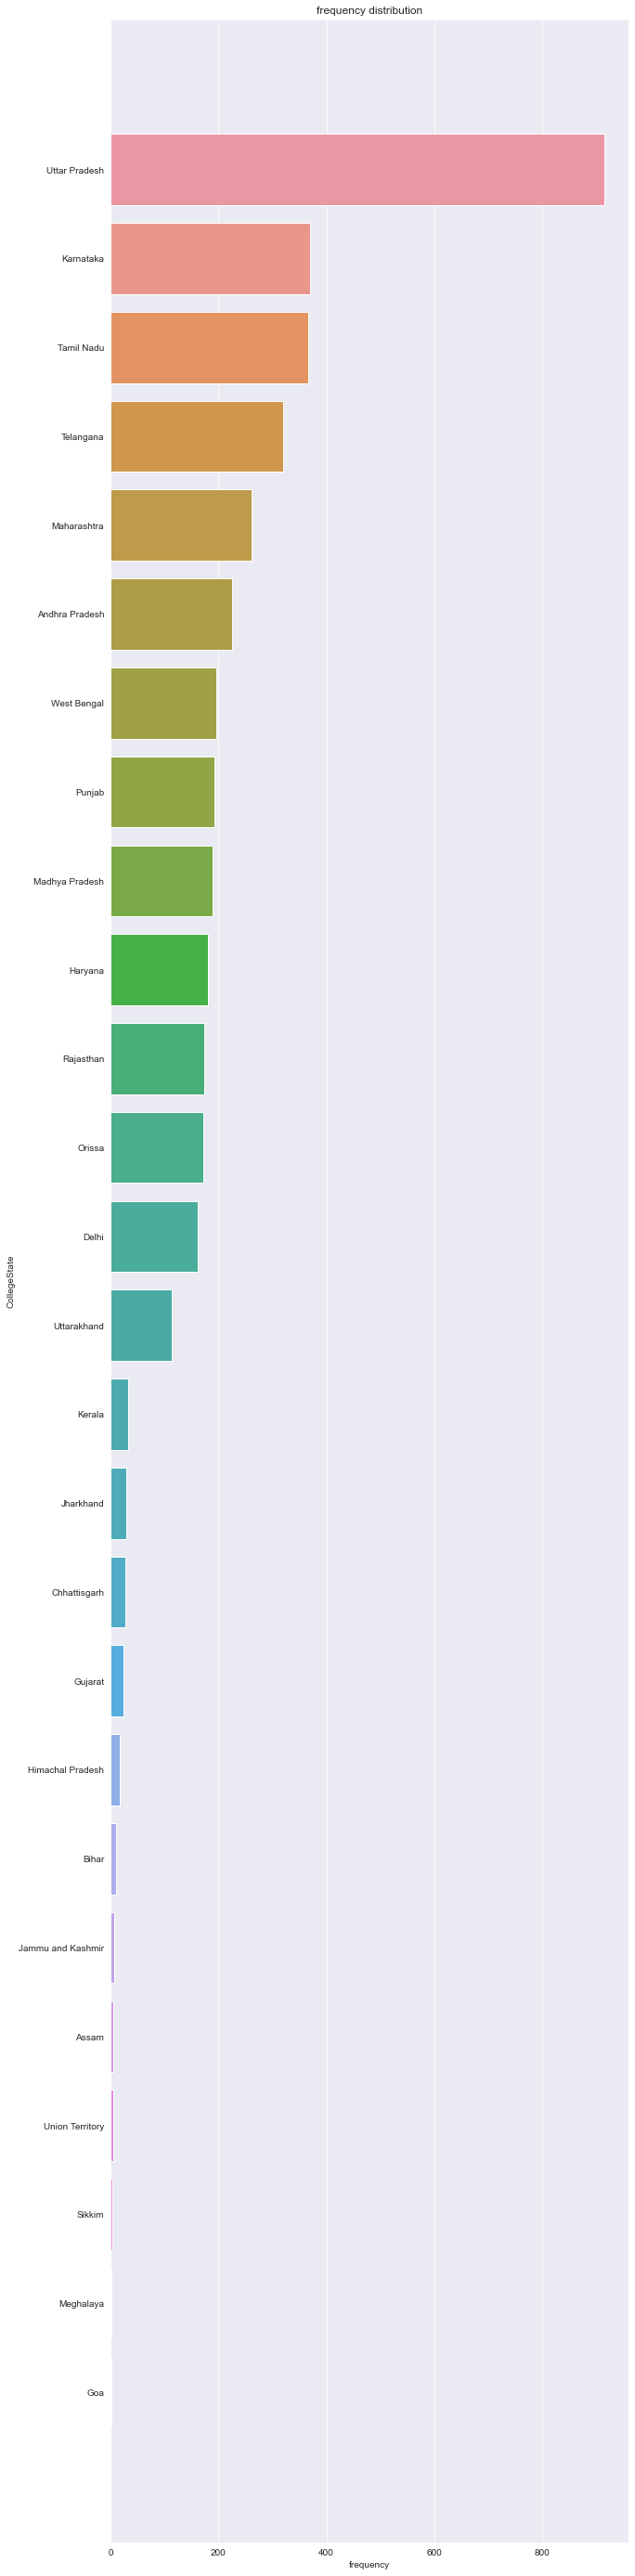

In [36]:
data_pos = cat_df['CollegeState'].value_counts()
fig1 = plt.figure(figsize=(10,50))
sns.barplot(y=data_pos.index,x=data_pos.values)
plt.title("frequency distribution")
plt.xlabel("frequency")
plt.ylabel("CollegeState")
plt.plot()

most of the students CollegeState belong to Uttar Pradesh ,followed by karnataka,tamil nadu,telangana

<h3 style="color: green">Bivarient Analysis:</h3>


<h3 style="color: green">Relationships between numerical columns</h3>

In [37]:
matrix = num_df.corr()
print("Correlation matrix is : ")
print(matrix)

Correlation matrix is : 
                             ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.247294      0.044547      0.673102   
Salary                -0.247294  1.000000      0.177373     -0.161383   
10percentage           0.044547  0.177373      1.000000      0.269957   
12graduation           0.673102 -0.161383      0.269957      1.000000   
12percentage           0.007069  0.170254      0.643378      0.259166   
CollegeID              0.284540 -0.118690      0.021082      0.254021   
CollegeTier            0.035160 -0.179332     -0.126042      0.027691   
collegeGPA             0.047144  0.130103      0.312538      0.086001   
CollegeCityID          0.284540 -0.118690      0.021082      0.254021   
CollegeCityTier       -0.035977  0.015384      0.116707     -0.003016   
GraduationYear         0.027539 -0.010053     -0.013799      0.014457   
English                0.135505  0.178219      0.350780      0.147925   
Logical                0.1

10 percentage and 12 percantage have  moderately postive correlation with 0.6433.Rest of the variables are not correalted or has poor correlation with each other.

<h3 style="color: green">Correlation between numerical columns using heatmap</h3>

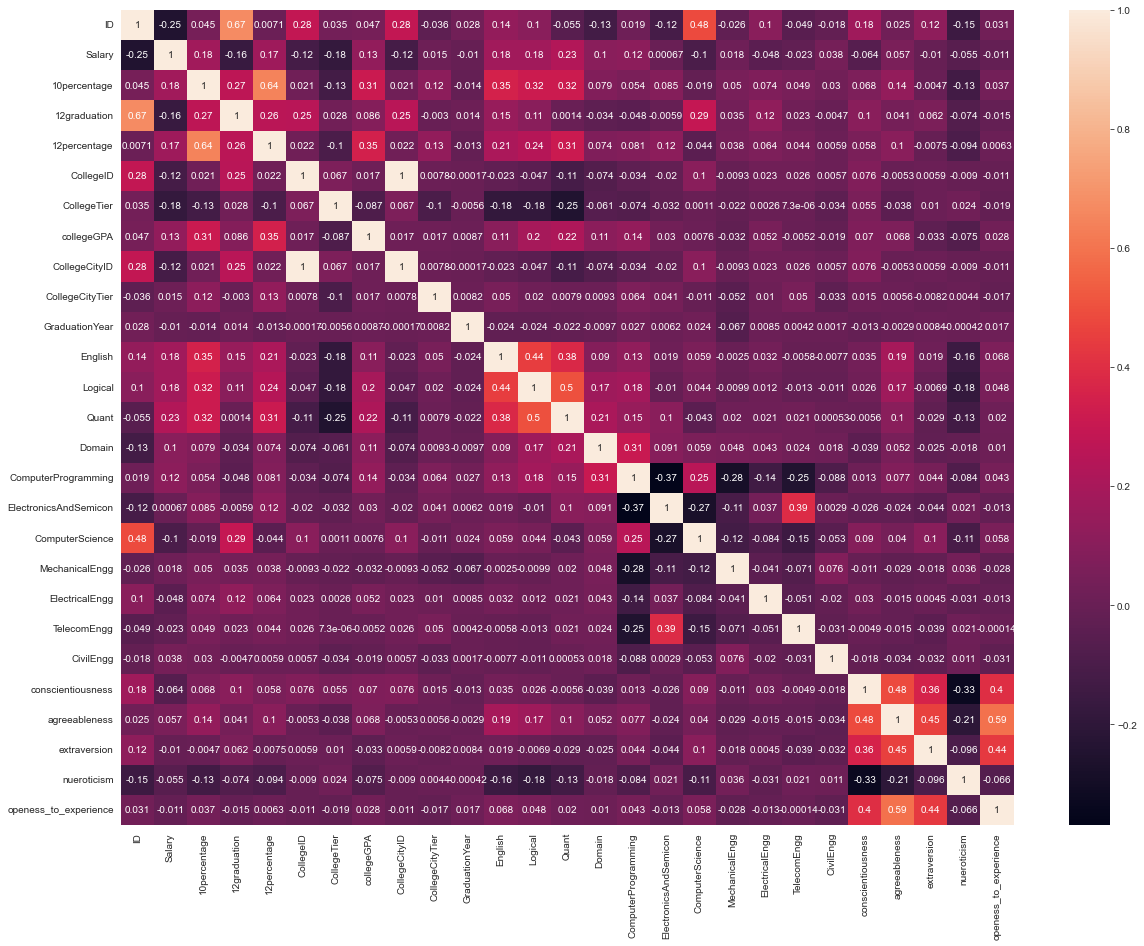

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(num_df.corr() , annot=True)
plt.show()

- From the above heatmap we can observe that 10percentage and 12percentage are moderately positively correlated with each other means if a student got a better marks in 10th standard then it is highly possible that he or she can get the better marks in 12th standard also

- We can also say that the subjects English,Logical,Quant have positively poor correlation with each other means if a student get better marks in one subject then there is a change for a student to get better marks in other subjects.

- As we can see that Conscientiousness, Agreeableness, Extraversion, and Openess_to_experience are poorly correlated with each other

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

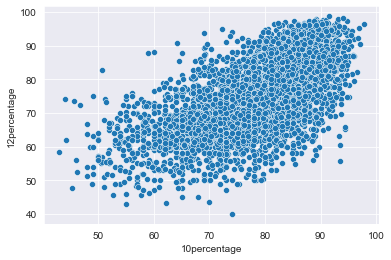

In [39]:
sns.scatterplot(x="10percentage",
                    y="12percentage",
                    data=num_df)

<h3 style="color: green">Bivariate analysis on numerical and categorical variables</h3>

In [40]:
count = df.groupby(['Designation','Salary'])['Salary'].size()

In [41]:
count = count.to_frame('count').reset_index()

In [42]:
count.max()

Designation    windows systems administrator
Salary                               4000000
count                                     47
dtype: object

There are 47 students as  windows systems administrator job with Salary 4000000 annualy which is the highest  package 

In [43]:
count.min()

Designation    .net developer
Salary                  35000
count                       1
dtype: object

There is one student with package 35000 as .net developer

<h3 style="color: green">Bivariate analysis  on Designation and Salary </h3>

[]

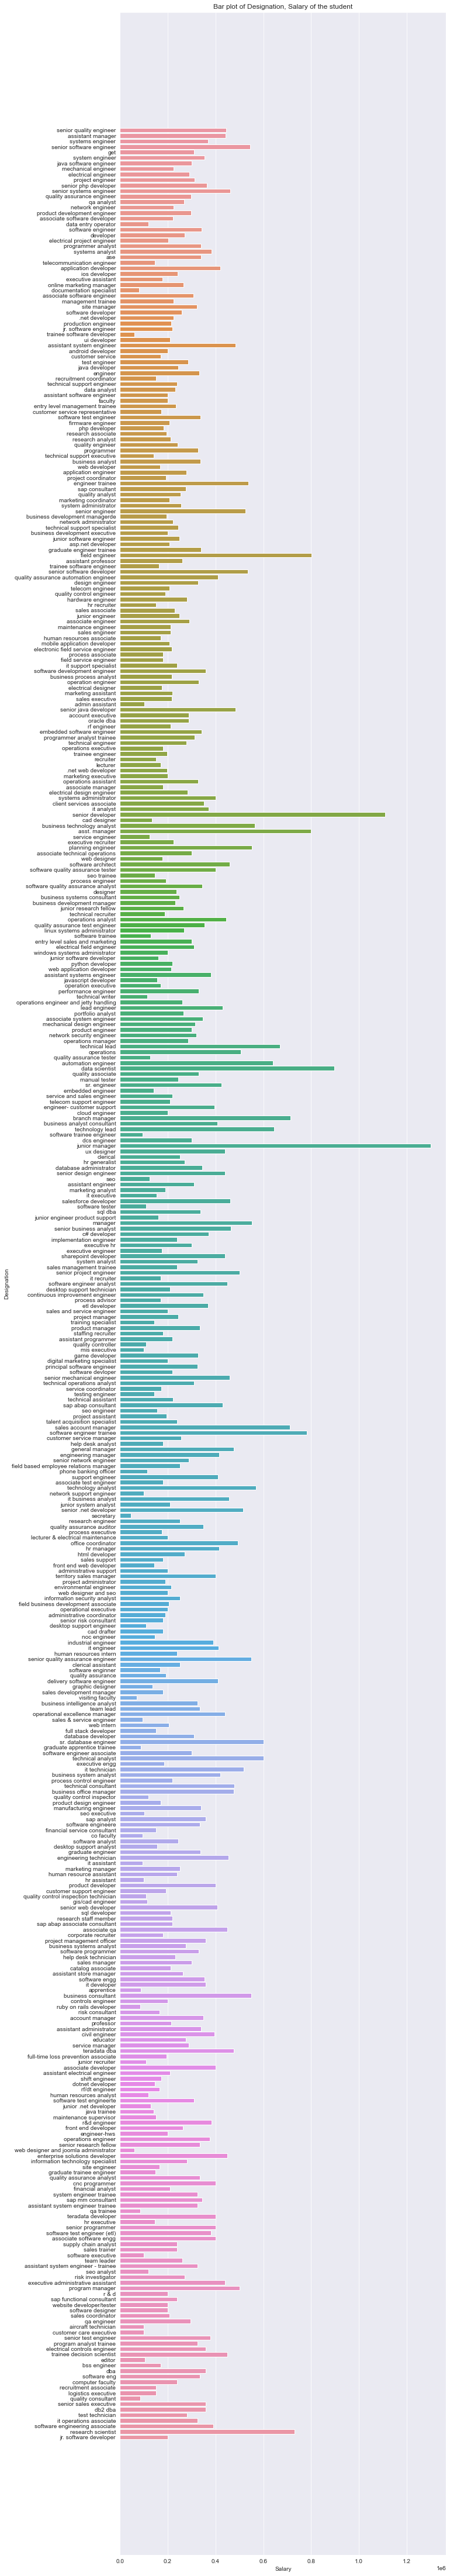

In [44]:
plt.figure(figsize=(10,80))
sns.barplot(y= df['Designation'],x = df['Salary'],ci = None )
plt.title("Bar plot of Designation, Salary of the student")
plt.xlabel("Salary")
plt.ylabel("Designation")
plt.plot()


 junior managers,Managers,Data Scientist,Technical lead,senior developer,sale account manager have packages more than average

<h3 style="color: green">Bivariate analysis on Salary and JobCity</h3>

[]

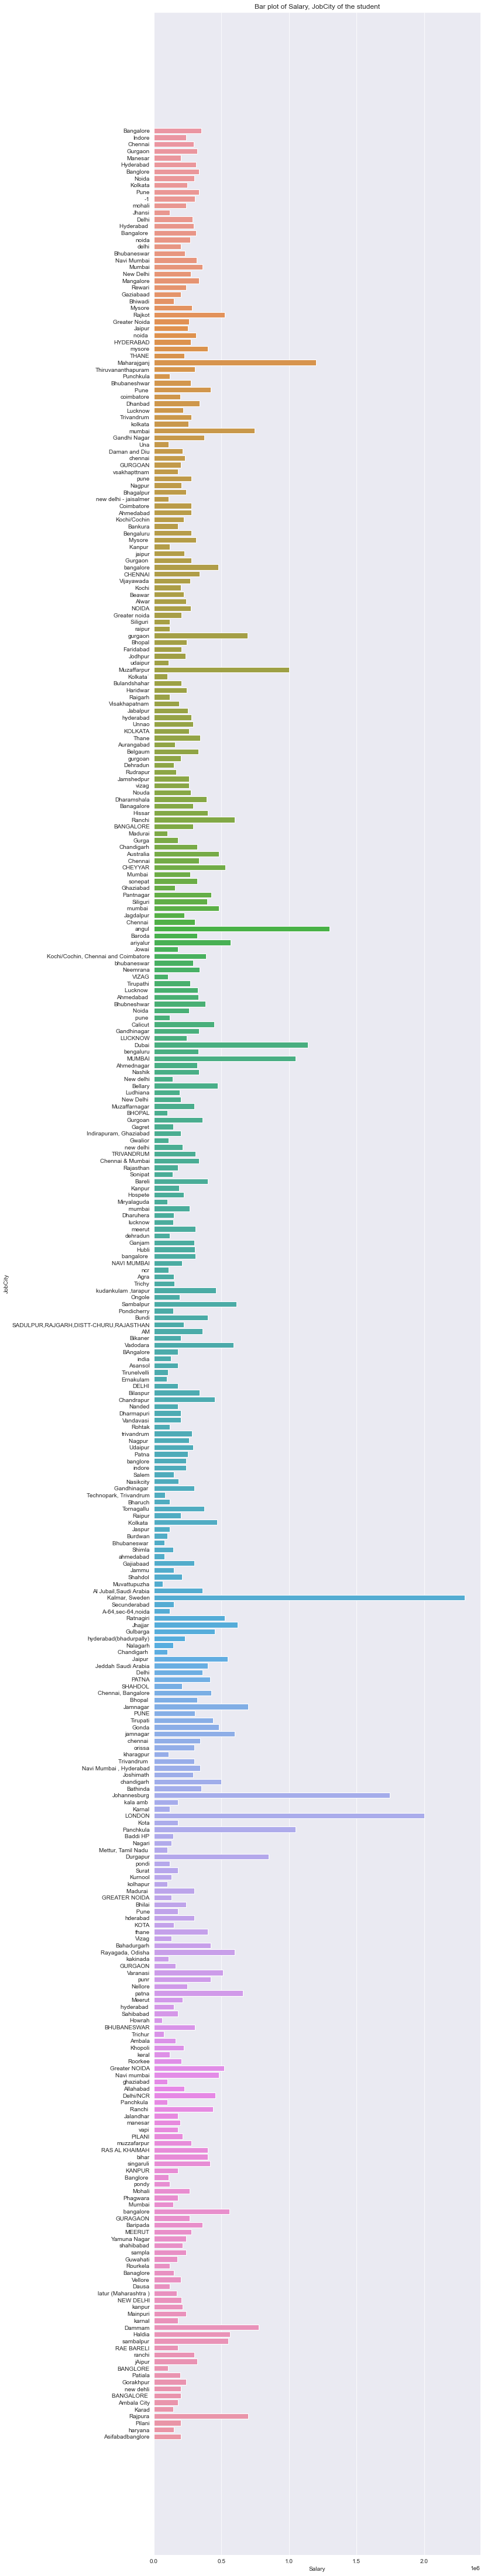

In [45]:
plt.figure(figsize=(10,80))
sns.barplot(y= df['JobCity'],x = df['Salary'],ci = None )
plt.title("Bar plot of Salary, JobCity of the student")
plt.xlabel("Salary")
plt.ylabel("JobCity")
plt.plot()

- Students located in  kalmar,Sweden has salary more compared to other students
- Students getting jobs in metropolitin cities have salary more than students in normal cities, towns in india
- We can observe that there is a considerable rise in salary of students who are  located outside india than students located in india

<h3 style="color: green">Bivariate analysis on Salary and Gender</h3>

[]

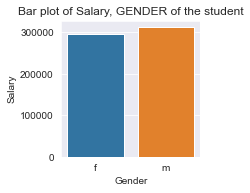

In [46]:
plt.figure(figsize=(2.5,2.5))
sns.barplot(y= df['Salary'],x = df['Gender'],ci = None )
plt.title("Bar plot of Salary, GENDER of the student")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.plot()

- we can observe male students have high salary than female students
- But both are approximately earning the same salary


<h3 style="color: green">Bivariate analysis on Salary and Degree</h3>

[]

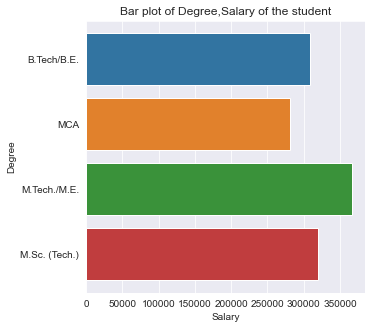

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(y= df['Degree'],x = df['Salary'],ci = None )
plt.title("Bar plot of Degree,Salary of the student")
plt.xlabel("Salary")
plt.ylabel("Degree")
plt.plot()

- students with M.tech/M.E degree earning more compared to btech
- M.sc are competiting with the b.tech students 

<h3 style="color: green">Bivariate analysis on Salary and Specialization </h3>

[]

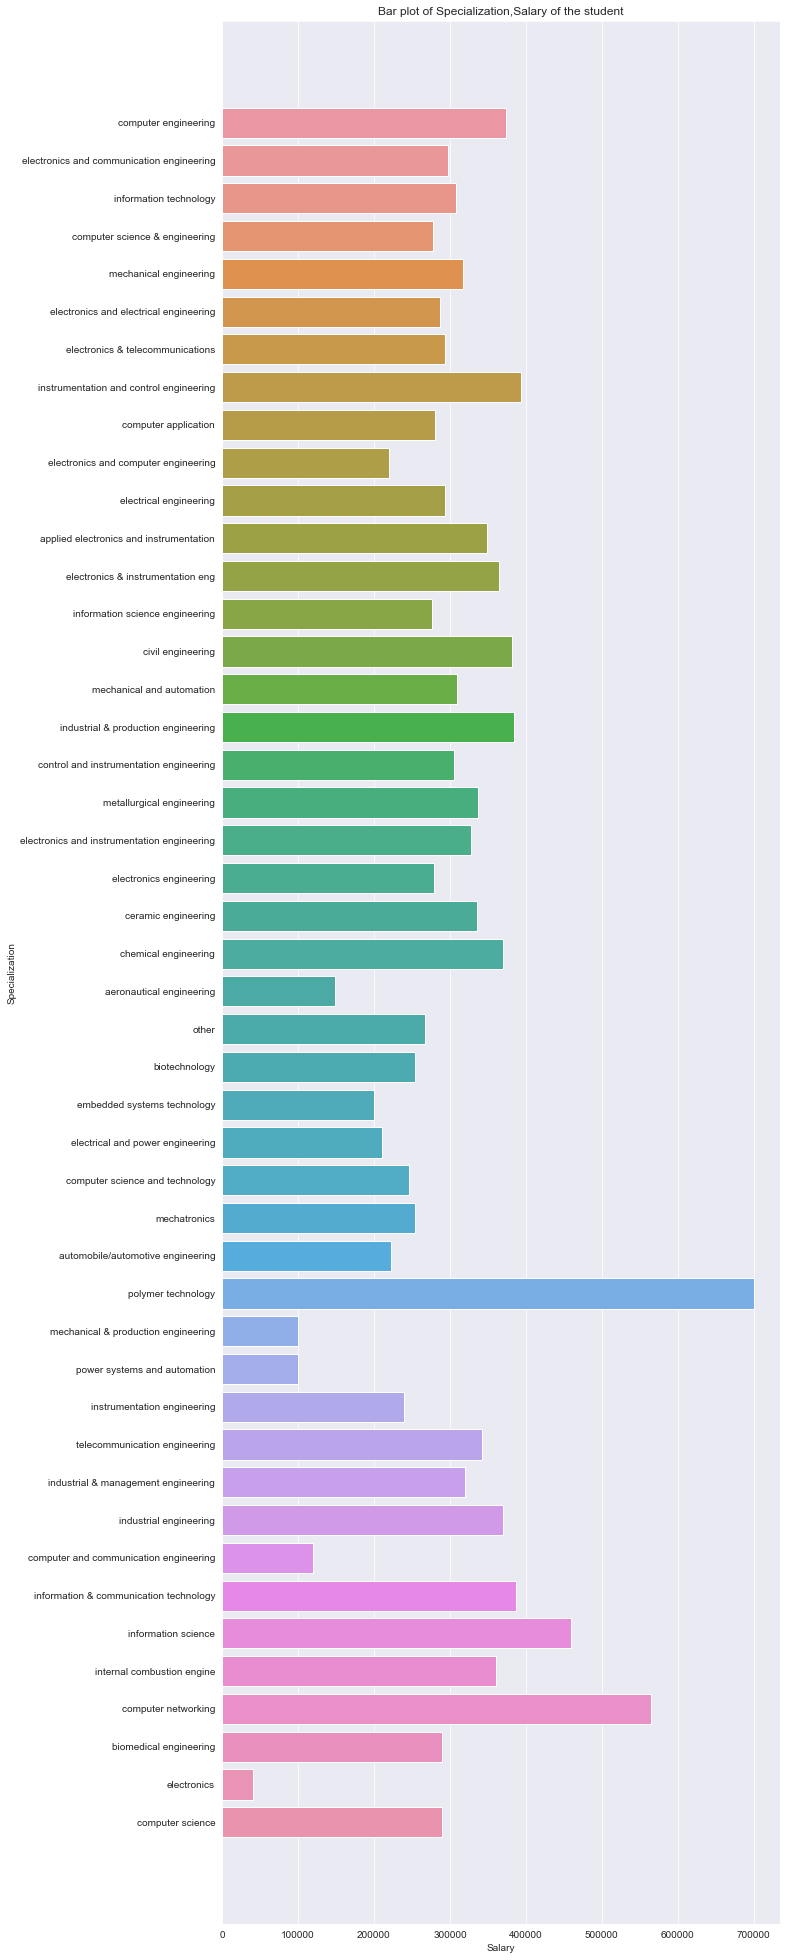

In [48]:
plt.figure(figsize=(10,35))
sns.barplot(y= df['Specialization'],x = df['Salary'],ci = None )
plt.title("Bar plot of Specialization,Salary of the student")
plt.xlabel("Salary")
plt.ylabel("Specialization")
plt.plot()

- students specialised in polymer technongy have highest salary
- students specialised in Compuer science ,information technology,computer networking have higher salaries comapred to other specializations

<h3 style="color: green">Bivariate analysis on Gender and collegeGPA</h3>

[]

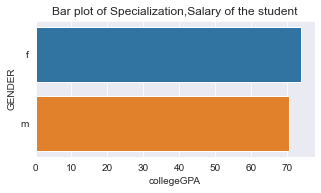

In [49]:
plt.figure(figsize=(5,2.5))
sns.barplot(y= df['Gender'],x = df['collegeGPA'],ci = None )
plt.title("Bar plot of Specialization,Salary of the student")
plt.xlabel("collegeGPA")
plt.ylabel("GENDER")
plt.plot()

We can observe that no of females have more college CGPA that male students

<h3 style="color: green">Research Questions</h3>


- __Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer,Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.__” 
- __Test this claim with the data given to you.__

Performing Hypothesis testing

Alternate Hypothesis (Bold Claim)  
Null Hypothesis (Accept Claim)

In [50]:
df['Salary']

0        420000
1        500000
2        325000
3       1100000
4        200000
         ...   
3993     280000
3994     100000
3995     320000
3996     200000
3997     400000
Name: Salary, Length: 3998, dtype: int64

In [51]:
# making the salary values to float 
df['Salary_K']= df['Salary']/100000


In [52]:
df['Salary_K']

0        4.20
1        5.00
2        3.25
3       11.00
4        2.00
        ...  
3993     2.80
3994     1.00
3995     3.20
3996     2.00
3997     4.00
Name: Salary_K, Length: 3998, dtype: float64

In [53]:
df[['Designation','Specialization']][df['Designation']=='programmer analyst']

Designation                             Specialization
24    programmer analyst             computer science & engineering
44    programmer analyst                       computer engineering
75    programmer analyst  electronics and communication engineering
114   programmer analyst                     information technology
124   programmer analyst     electronics and electrical engineering
...                  ...                                        ...
3539  programmer analyst                       computer engineering
3777  programmer analyst           electronics & telecommunications
3820  programmer analyst             computer science & engineering
3880  programmer analyst             computer science & engineering
3973  programmer analyst                     information technology

[139 rows x 2 columns]

In [54]:
#Average salary of all the students with jobs as a Programming Analyst, Software
#Engineer,Hardware Engineer and Associate Engineer
print("Average salary of a student as")
print('Programmer Analyst :',round(df['Salary_K'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 3))
print('Software Engineer :',round(df['Salary_K'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),3))
print('Hardware Engineer :',round(df['Salary_K'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 3))
print('Associate Engineer :',round(df['Salary_K'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(),3))

Average salary of a student as
Programmer Analyst : 3.017
Software Engineer : 3.395
Hardware Engineer : nan
Associate Engineer : 3.325


In [55]:
#population
print("Average salary of a student as")
print('Programmer Analyst :',round(df['Salary_K'][(df['GraduationYear']) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 3))
print('Software Engineer :',round(df['Salary_K'][(df['GraduationYear']) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),3))
print('Hardware Engineer :',round(df['Salary_K'][(df['GraduationYear']) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 3))
print('Associate Engineer :',round(df['Salary_K'][(df['GraduationYear']) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(),3))

Average salary of a student as
Programmer Analyst : 3.435
Software Engineer : 3.315
Hardware Engineer : nan
Associate Engineer : nan


In [56]:
# Defining the sample parameters
sample = [3.4,3.1,0,3.5,3.9]
sample = np.array(sample)
sample_size = len(sample)
sample_mean = np.mean(sample)
print("sample_mean",sample_mean)

sample_mean 2.7800000000000002


In [57]:
# Sample Standard Devation
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 5)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.4133647795243802


In [58]:
# Defining the sample and population parameters
pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

In [59]:
# Calculating the t-score
numerator = sample_mean - pop_mean
denomenator = sample_std / (sample_size**0.5)
t_score = numerator / denomenator
print("t_score:",t_score)

t_score: 5.619047619047618


In [60]:
# Setting the Confidence Level

# Two Tail - Deciding the Significance Level & Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

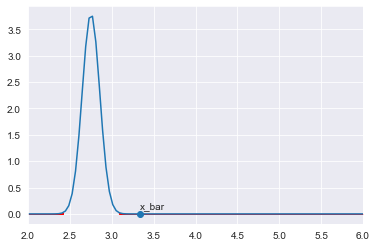

In [61]:
# Visualizing the Sampling Distribution with Rejection Regions
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max = 6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [62]:
# Compairing the Table Value and T-score value

# Conclusion using t-test

if np.abs(t_score) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [63]:
# Conclusion using p-test
p_value = 2 * (1.0 - norm.cdf(np.abs(t_score)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis


<h3>Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)<h3>

<h3 style="color: green">Chi2 Test</h3>

Lets make a bold Claim that Gender and specialisation are dependent.

Alternate Hypothesis: They are Dependent

and Null Hypothesis: They are Indepndent

In [66]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary_K'],
      dtype='object')

In [68]:
#Looking at the freqency distribution

pd.crosstab(df['Specialization'], df['Gender'], margins=True)

Gender                                         f     m   All
Specialization                                              
aeronautical engineering                       1     2     3
applied electronics and instrumentation        2     7     9
automobile/automotive engineering              0     5     5
biomedical engineering                         2     0     2
biotechnology                                  9     6    15
ceramic engineering                            0     1     1
chemical engineering                           1     8     9
civil engineering                              6    23    29
computer and communication engineering         0     1     1
computer application                          59   185   244
computer engineering                         175   425   600
computer networking                            0     1     1
computer science                               1     1     2
computer science & engineering               183   561   744
computer science and technology                2     4     6
control and instrumentation engineering        0     1     1
electrical and power engineering               0     2     2
electrical engineering                        17    65    82
electronics                                    0     1     1
electronics & instrumentation eng             10    22    32
electronics & telecommunications              28    93   121
electronics and communication engineering    212   668   880
electronics and computer engineering           0     3     3
electronics and electrical engineering        34   162   196
electronics and instrumentation engineering    5    22    27
electronics engineering                        3    16    19
embedded systems technology                    0     1     1
industrial & management engineering            0     1     1
industrial & production engineering            2     8    10
industrial engineering                         1     1     2
information & communication technology         2     0     2
information science                            0     1     1
information science engineering                8    19    27
information technology                       173   487   660
instrumentation and control engineering        9    11    20
instrumentation engineering                    0     4     4
internal combustion engine                     0     1     1
mechanical & production engineering            0     1     1
mechanical and automation                      0     5     5
mechanical engineering                        10   191   201
mechatronics                                   1     3     4
metallurgical engineering                      0     2     2
other                                          0    13    13
polymer technology                             0     1     1
power systems and automation                   0     1     1
telecommunication engineering                  1     5     6
All                                          957  3041  3998

In [70]:
# These are the observed frequencies

observed = pd.crosstab(df['Specialization'], df['Gender'])

observed

Gender                                         f    m
Specialization                                       
aeronautical engineering                       1    2
applied electronics and instrumentation        2    7
automobile/automotive engineering              0    5
biomedical engineering                         2    0
biotechnology                                  9    6
ceramic engineering                            0    1
chemical engineering                           1    8
civil engineering                              6   23
computer and communication engineering         0    1
computer application                          59  185
computer engineering                         175  425
computer networking                            0    1
computer science                               1    1
computer science & engineering               183  561
computer science and technology                2    4
control and instrumentation engineering        0    1
electrical and power engineering               0    2
electrical engineering                        17   65
electronics                                    0    1
electronics & instrumentation eng             10   22
electronics & telecommunications              28   93
electronics and communication engineering    212  668
electronics and computer engineering           0    3
electronics and electrical engineering        34  162
electronics and instrumentation engineering    5   22
electronics engineering                        3   16
embedded systems technology                    0    1
industrial & management engineering            0    1
industrial & production engineering            2    8
industrial engineering                         1    1
information & communication technology         2    0
information science                            0    1
information science engineering                8   19
information technology                       173  487
instrumentation and control engineering        9   11
instrumentation engineering                    0    4
internal combustion engine                     0    1
mechanical & production engineering            0    1
mechanical and automation                      0    5
mechanical engineering                        10  191
mechatronics                                   1    3
metallurgical engineering                      0    2
other                                          0   13
polymer technology                             0    1
power systems and automation                   0    1
telecommunication engineering                  1    5

In [72]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies
from scipy.stats import chi2
from scipy.stats import chi2_contingency
chi2_contingency(observed)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [73]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
data = chi2_contingency(observed)[2]

In [75]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, data)

chi2_critical

57.50530474499599

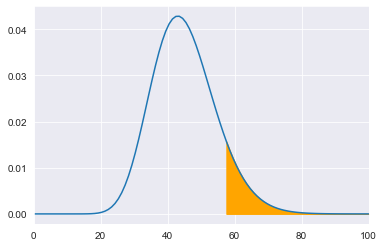

In [77]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, data)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, data)
plt.fill_between(x1, y1, color='orange')

In [78]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [79]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<h3 style="color: green">Feature Transformation</h3>

In [80]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
# Standardizing Salary Column
scaled_salary = scaler.fit_transform(df['Salary'].values.reshape(-1,1))

In [82]:
print(scaled_salary[1:10])

[[0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]]


In [83]:
#Standardizing 10th percent Column
scaled_10percentage = scaler.fit_transform(df['10percentage'].values.reshape(-1,1))

print(scaled_10percentage[1:10])

[[0.7742878 ]
 [0.7669832 ]
 [0.7779401 ]
 [0.63915267]
 [0.8568298 ]
 [0.78670562]
 [0.89481373]
 [0.85829072]
 [0.62089116]]


In [84]:
# Standardizing 12th percent Column
scaled_12percentage = scaler.fit_transform(df['12percentage'].values.reshape(-1,1))

print(scaled_12percentage[1:10])

[[0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]]


In [85]:
# Standardization for Categorical Features:

# One-hot Encoding of Gender column
dummy_variable = pd.get_dummies(df[['Gender']])
dummy_variable

Gender_f  Gender_m
0            1         0
1            0         1
2            1         0
3            0         1
4            0         1
...        ...       ...
3993         0         1
3994         1         0
3995         0         1
3996         1         0
3997         1         0

[3998 rows x 2 columns]

In [86]:
df1 = pd.concat([df,dummy_variable],axis='columns')
df1.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  TelecomEngg  CivilEngg  conscientiousness agreeableness  extraversion  \
0          -1         -1             0.9737        0.8128        0.5269   
1          -1         -1            -0.7335        0.3789        1.2396   
2          -1         -1             0.2718        1.7109        0.1637   
3          -1         -1             0.0464        0.3448       -0.3440   
4          -1         -1            -0.8810       -0.2793       -1.0697   

   nueroticism openess_to_experience Salary_K  Gender_f  Gender_m  
0      1.35490               -0.4455     4.20         1         0  
1     -0.10760                0.8637     5.00         0         1  
2     -0.86820                0.6721     3.25         1         0  
3     -0.40780               -0.9194    11.00         0         1  
4      0.09163               -0.1295     2.00         0         1  

[5 rows x 42 columns]